In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from scipy.stats import gaussian_kde
from scipy.optimize import curve_fit

plt.style.use('pablet')

In [16]:
data= pd.read_csv('data.csv', sep=',', skiprows=1)
data.head()

z= data['z']
stellarM= np.asarray(data['stellarM'])
SFR= np.asarray(data['SFR'])
OH= np.asarray(data['OH'])
print(min(z), max(z))
print(min(stellarM), max(stellarM))
print(min(SFR), max(SFR))
print(min(OH), max(OH))


0.005001361 0.2499649
6.012018 12.49228
-4.969467 3.875076
7.67 9.469999


In [17]:
def fit(x, a, b, c):
    return a+b*x+c*x**2

[ 2.09410546  1.08548718 -0.04044778]


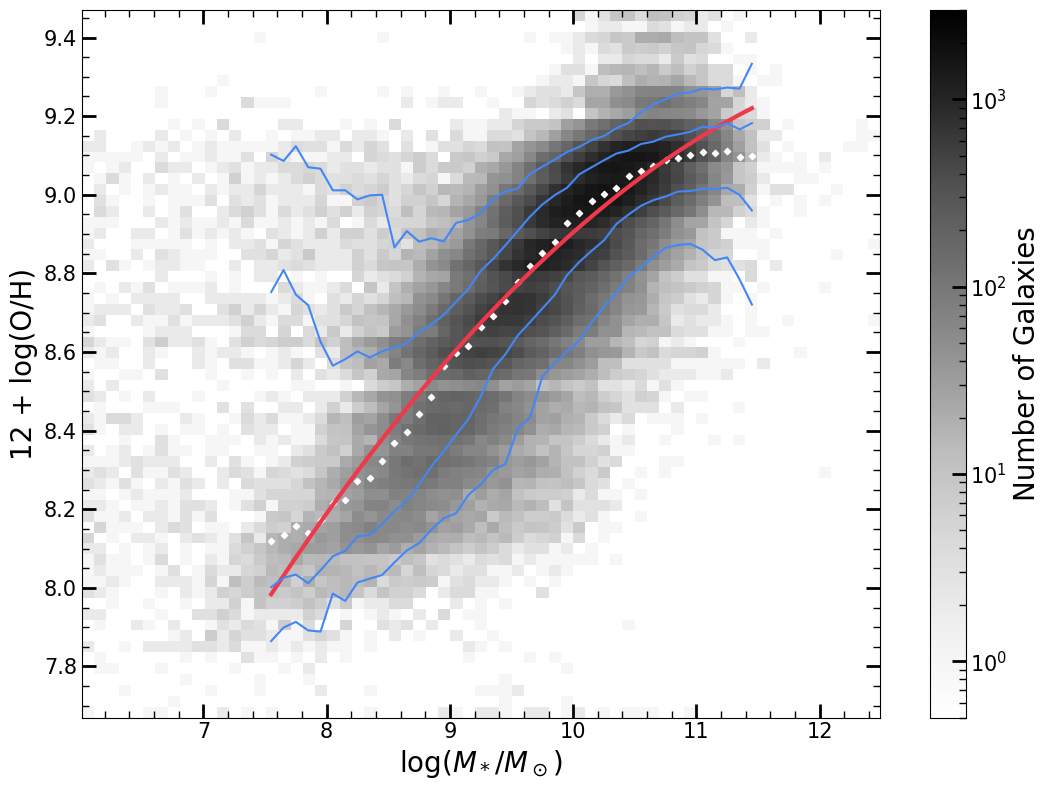

In [18]:
mask1= np.where((stellarM>7.5)*(stellarM<11.5))

plt.figure(figsize=(11, 8))

p2_5= []
p16= []
p50= []
p84= []
p97_5= []

a=7.5
b=7.6
for i in range(40):
    mask= np.where((stellarM>a)*(stellarM<b))
    p2_5.append(np.percentile(OH[mask], 2.5))
    p16.append(np.percentile(OH[mask], 16))
    p50.append(np.percentile(OH[mask], 50))
    p84.append(np.percentile(OH[mask], 84))
    p97_5.append(np.percentile(OH[mask], 97.5))
    a+=0.1
    b+=0.1


#fit
popt, _ = curve_fit(fit, stellarM[mask1], OH[mask1])
A= popt[0]
B= popt[1]
C= popt[2]
print(popt)
m= np.linspace(7.55, 11.45, 100)
plt.plot(m, fit(m, A, B, C), c='#ed394b', lw=3)

#2dhist
h= plt.hist2d(stellarM, OH, bins=65, cmap='Greys', norm=mcolors.LogNorm())
cbar= plt.colorbar(h[3], label='Number of Galaxies')
h[3].set_clim(5e-1, 3e3)

#Contours at 1 and 2 sigma
#per xbin calculate 2.5, 16, 50, 84, 97.5 percentiles
mass_contours= np.linspace(7.55, 11.45, 40)
plt.plot(mass_contours, p2_5, c='#4287f5')
plt.plot(mass_contours, p16, c='#4287f5')
plt.scatter(mass_contours, p50, c='w', marker='D', s=10)
plt.plot(mass_contours, p84, c='#4287f5')
plt.plot(mass_contours, p97_5, c='#4287f5')

plt.xlabel(f'log($M_*/M_\odot$)')
plt.ylabel(f'12 + log(O/H)')

plt.tight_layout()
plt.show()

[-2.12062854  1.92981889 -0.08261406]


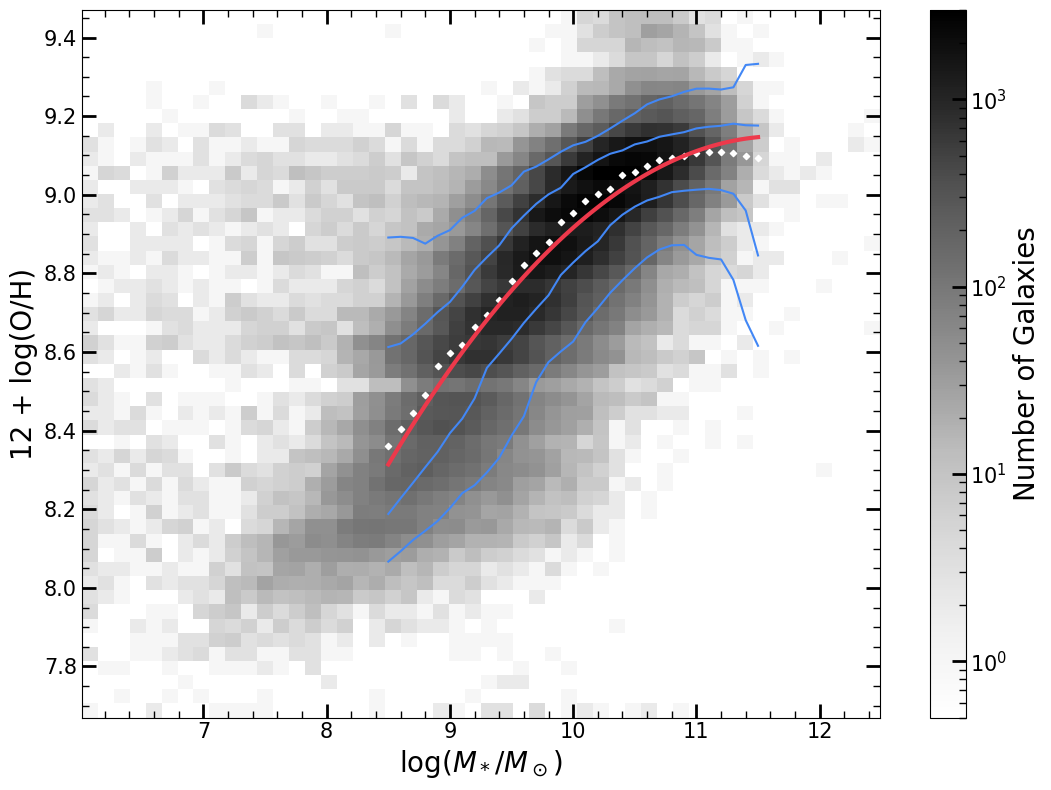

In [19]:
mask2= np.where((stellarM>8.5)*(stellarM<11.5))

plt.figure(figsize=(11, 8))

p2_5= []
p16= []
p50= []
p84= []
p97_5= []

a=8.45
b=8.65
for i in range(31):
    mask= np.where((stellarM>a)*(stellarM<b))
    p2_5.append(np.percentile(OH[mask], 2.5))
    p16.append(np.percentile(OH[mask], 16))
    p50.append(np.percentile(OH[mask], 50))
    p84.append(np.percentile(OH[mask], 84))
    p97_5.append(np.percentile(OH[mask], 97.5))
    a+=0.1
    b+=0.1

#fit
popt, _ = curve_fit(fit, stellarM[mask2], OH[mask2])
A= popt[0]
B= popt[1]
C= popt[2]
print(popt)
m= np.linspace(8.5, 11.5, 100)
plt.plot(m, fit(m, A, B, C), c='#ed394b', lw=3)

#2dhist
h= plt.hist2d(stellarM, OH, bins=50, cmap='Greys', norm=mcolors.LogNorm())
cbar= plt.colorbar(h[3], label='Number of Galaxies')
h[3].set_clim(5e-1, 3e3)

#Contours at 1 and 2 sigma
#per xbin calculate 2.5, 16, 50, 84, 97.5 percentiles
mass_contours= np.linspace(8.5, 11.5, 31)
plt.plot(mass_contours, p2_5, c='#4287f5')
plt.plot(mass_contours, p16, c='#4287f5')
plt.scatter(mass_contours, p50, c='w', marker='D', s=10)
plt.plot(mass_contours, p84, c='#4287f5')
plt.plot(mass_contours, p97_5, c='#4287f5')

plt.xlabel(f'log($M_*/M_\odot$)')
plt.ylabel(f'12 + log(O/H)')

plt.tight_layout()
plt.show()


/var/folders/tq/v61_thw53_d2qxd50zxns3xr0000gn/T/ipykernel_5703/4125025448.py:4: RuntimeWarning: invalid value encountered in divide
  SFR_mean = np.divide(SFR_sum, SFR_count, out=np.zeros_like(SFR_sum))


<Figure size 1200x700 with 0 Axes>

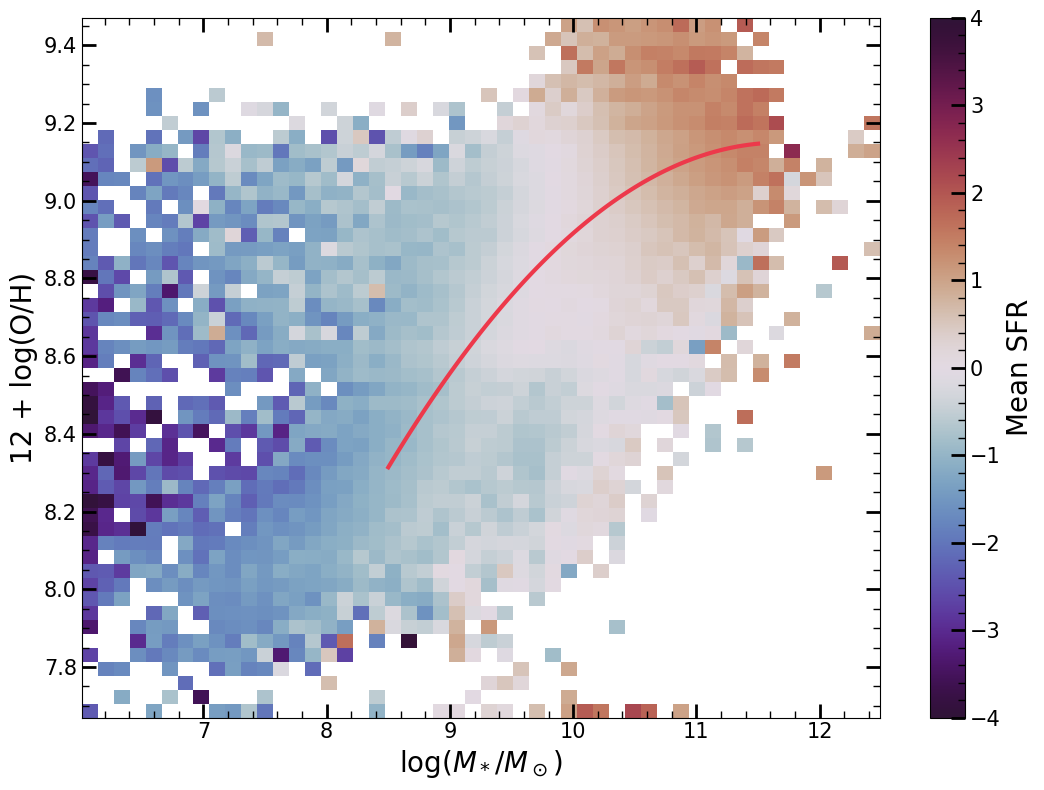

In [20]:
h, x, y, _= plt.hist2d(stellarM, OH, bins=50)
SFR_sum, _, _ = np.histogram2d(stellarM, OH, bins=[x, y], weights=SFR)
SFR_count, _, _ = np.histogram2d(stellarM, OH, bins=[x, y])
SFR_mean = np.divide(SFR_sum, SFR_count, out=np.zeros_like(SFR_sum))
plt.clf()

plt.figure(figsize=(11, 8))

#SFR colorbar
mesh= plt.pcolormesh(x, y, SFR_mean.T, cmap='twilight_shifted', vmin=-4, vmax=4)
cbar= plt.colorbar(mesh, label='Mean SFR')
plt.plot(m, fit(m, A, B, C), c='#ed394b', lw=3)

plt.xlabel(f'log($M_*/M_\odot$)')
plt.ylabel(f'12 + log(O/H)')
plt.tight_layout()
plt.show()



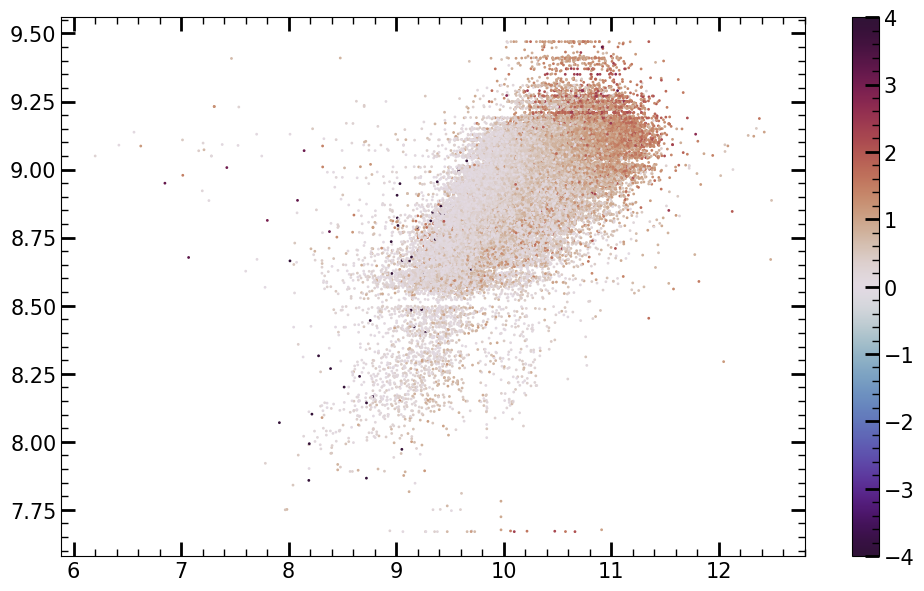

In [21]:
mask= np.where(SFR>0)
sc= plt.scatter(stellarM[mask], OH[mask], c=SFR[mask], cmap='twilight_shifted', s=1, alpha=1, vmin=-4, vmax=4)
plt.colorbar(sc)
plt.show()

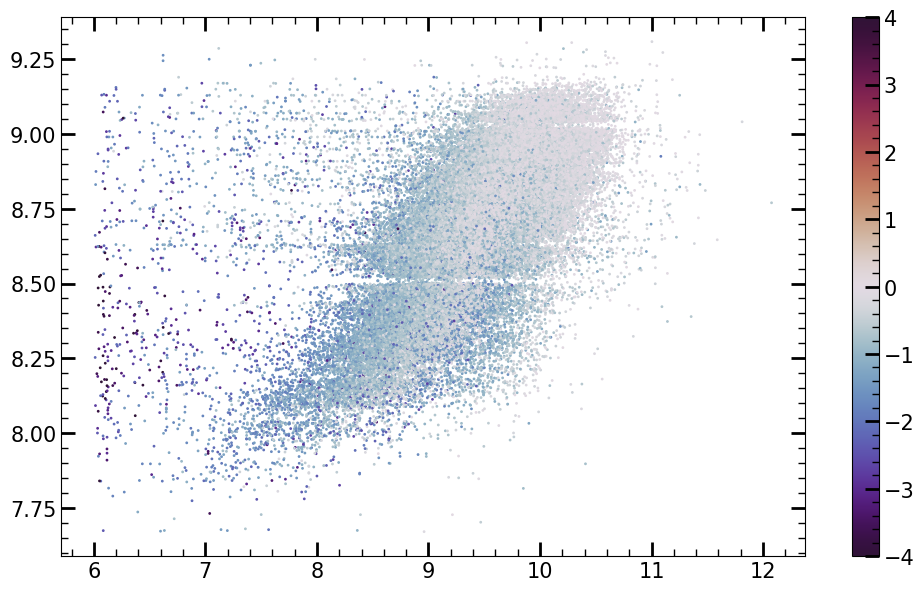

In [22]:
mask= np.where(SFR<0)
sc= plt.scatter(stellarM[mask], OH[mask], c=SFR[mask], cmap='twilight_shifted', s=1, alpha=1, vmin=-4, vmax=4)
plt.colorbar(sc)
plt.show()